# Measurement of 'Bestness': Neighborhood Speed Bump Density

*Individual Notebook for Stephen Grenesko*
## The Metric

    This particular sub-metric focuses on the amount of speed bumps per neighborhood within the city of Pittsburgh. Based on data from the Western PA Regional Data Center (https://data.wprdc.org/dataset/), we were able to extract a set of data that contained every neighborhood known to have speed bumps, as well as how many speed bumps they had. By utilizing Python along with the pandas and matplotlib libraries, we can use this data to create visualizations to represent said data, providing a clearer image.

## The Data

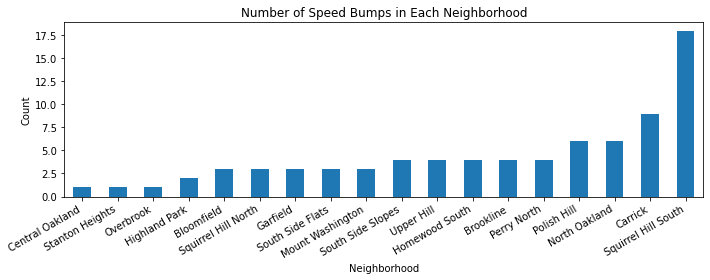

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import data from csv
try:
    bumpData = pd.read_csv("speed_bump_data.csv", index_col="neighborhood")
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

neighborhoodCount = bumpData.groupby('neighborhood').size()

# Sort the neighborhood count data from least to greatest
neighborhoodCount_sorted = neighborhoodCount.sort_values()

# Plot the data on a bar graph
plt.figure(figsize=(10, 4))
neighborhoodCount_sorted.plot(kind='bar')
plt.title('Number of Speed Bumps in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=30, fontsize=10, ha='right')  # Adjust fontsize and alignment
plt.tight_layout()
plt.show()


    For our overall metric of greatness, that of which Pittsburgh neighborhood is the most suitable for drag racing, we selected the speed bump amount per neighborhood as an important sub-metric to analyze due to the inability to go down roads with high speeds. The presence of vast amounts of speed bumps in a neighborhood would hinder such races, preventing drivers from going top speed, or even resulting in flips and crashes. Because of this, we have sorted the data by amount of speed bumps listed in the .csv, which was then passed into a very simple to understand bar graph, which allows one to easily discern which neighborhoods have the least or most amount of speed bumps.

## The Verdict

    Based upon the given dataset, looking at the neighborhoods to the right of the graph, (this denotes them having the least amount of speed bumps), that the overall best neighborhoods for drag racing would be Central Oakland, Staton Heights, or Overbrook. Since we have several possible options, and we must choose one, we can look at the street maps to determine the placement of said bumps to see how inconvienient they are. There